In [422]:
# Get thinkdsp.py
import os
import numpy

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve

    urlretrieve("https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py", "thinkdsp.py")

from thinkdsp import decorate, Sinusoid, normalize, unbias, SquareSignal, \
    TriangleSignal, SinSignal

### Упражнение 2.2
Написание класса `SawtoothSignal` и вычисление
спектра пилообразного сигнала.

Класс `SawtoothSignal`

In [423]:
class SawtoothSignal(Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / numpy.pi / 2
        frac, _ = numpy.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

Используем класс, проверим его и прослушаем результат

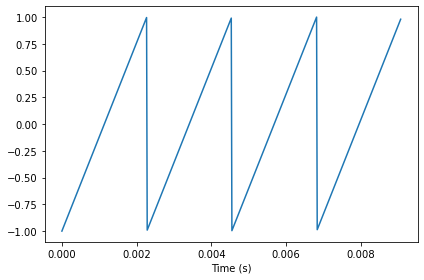

In [424]:
sawtooth_signal = SawtoothSignal()
sawtooth_wave = sawtooth_signal.make_wave(duration=0.5, framerate=60000)
sawtooth_wave.segment(start=0, duration=sawtooth_signal.period * 4).plot()
decorate(xlabel='Time (s)')
sawtooth_wave.make_audio()

Спектр пилообразного сигнала

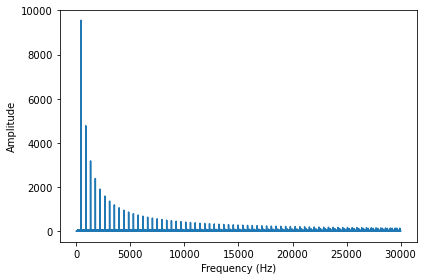

In [425]:
sawtooth_wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Спектр треугольного (синий) и пилообразного (красный) сигналов

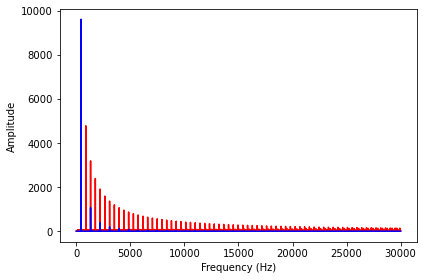

In [426]:
sawtooth_wave.make_spectrum().plot(color='red')
triangle_wave = TriangleSignal(amp=0.79).make_wave(duration=0.5, framerate=60000)  ##kek
triangle_wave.make_spectrum().plot(color='blue')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Звук треугольного

In [427]:
triangle_wave.make_audio()

Спектр прямоугольного (синий) и пилообразного (красный) сигналов

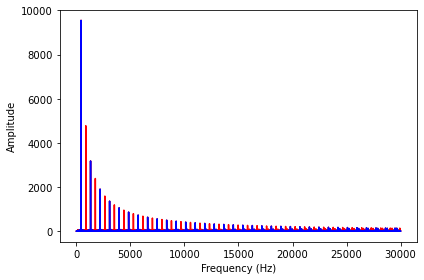

In [428]:
sawtooth_wave.make_spectrum().plot(color='red')
square_wave = SquareSignal(amp=0.5).make_wave(duration=0.5, framerate=60000)  ##kek
square_wave.make_spectrum().plot(color='blue')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Звук прямоугольного

In [429]:
square_wave.make_audio()

### Упражнение 2.3
Создание прямоугольного сигнала 1100 Гц и вычисление
`wave` с выборками 10000 кадров в секунду

Создание сигнала и вычисление спектра

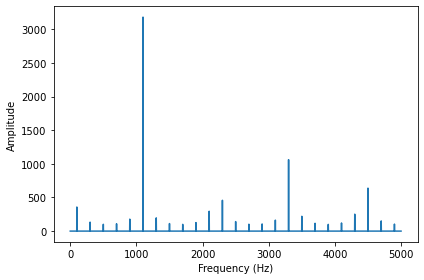

In [430]:
square_wave = SquareSignal(1100).make_wave(duration=0.5, framerate=10000)
square_wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Пики должны быть 1100, 3300, 5500, 7700, 9900 (у прямоугольного только нечетные гармоники),
но мы их видим на 1100, 3300, 4500, 2300 и 100. Это возникает из-за эффекта биения.

Преобразуем в аудио


In [431]:
square_wave.make_audio()

Сравнение с синусоидой

In [432]:
SinSignal(1500).make_wave(duration=0.5, framerate=10000).make_audio()

### Упражнение 2.4
Работа со `Spectrum`.

Создание сигнала, получение и вывод `wave`

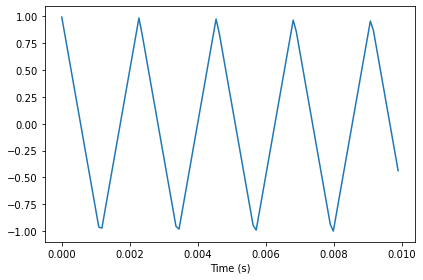

In [433]:
triangle_wave = TriangleSignal(440).make_wave(duration=0.01)
triangle_wave.plot()
decorate(xlabel='Time (s)')

Создание спектра и вывод `hs[0]`

In [434]:
triangle_spectrum = triangle_wave.make_spectrum()
triangle_spectrum.hs[0]

(1.0436096431476471e-14+0j)

Изменение первого элемента спектра и сравнение

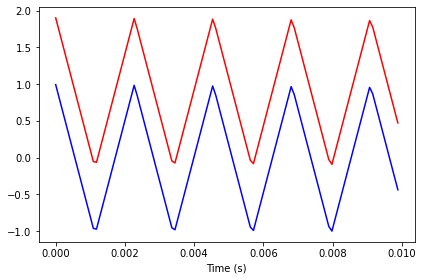

In [435]:
triangle_spectrum.hs[0] = 100
triangle_wave.plot(color='blue')
triangle_spectrum.make_wave().plot(color='red')
decorate(xlabel='Time (s)')

### Упражнение 2.5
Функция, принимающая `Spectrum` как параметр и изменяющая его делением
каждого элемента `hs` на соответствующую частоту из `fs`.

Функция

In [436]:
def change_spectrum(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

Тестирование на пилообразном сигнале

Создание `wave` и воспроизведение звука

In [437]:
sawtooth_wave = SawtoothSignal().make_wave(duration=0.5)
sawtooth_wave.make_audio()

Создание и вывод спектра

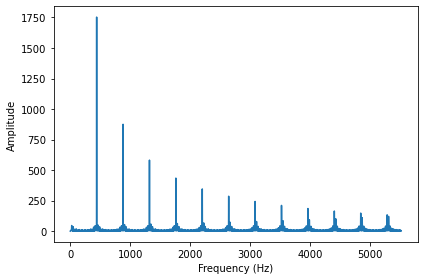

In [438]:
sawtooth_spectrum = sawtooth_wave.make_spectrum()
sawtooth_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Изменение спектра с помощью нашей функции и сравнение с изначальным спектром


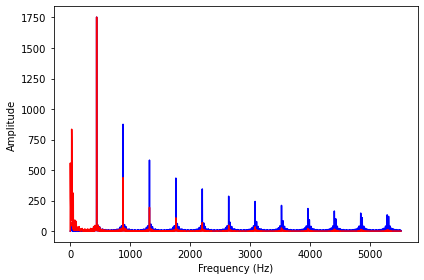

In [439]:
sawtooth_spectrum.plot(color='blue')
change_spectrum(sawtooth_spectrum)
sawtooth_spectrum.scale(440)
sawtooth_spectrum.plot(color='red')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Звук изменённого спектра

In [440]:
sawtooth_spectrum.make_wave().make_audio()

### Упражнение 2.6
Создание сигнала, состоящего из чётных и нечётных гармоник, спадающих пропорционально $1/f^2$.

За основу возьмём пилообразны сигнал.

Создание пилообразного сигнала и получение его `wave`.

In [441]:
sawtooth_wave = SawtoothSignal(500).make_wave(duration=0.5, framerate=20000)
sawtooth_wave.make_audio()

Получение спектра

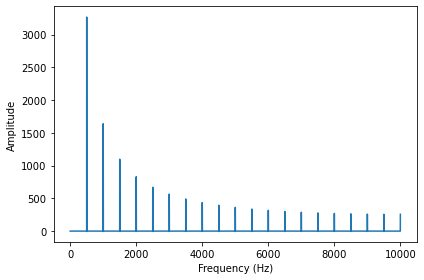

In [442]:
sawtooth_spectrum = sawtooth_wave.make_spectrum()
sawtooth_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Изменение спада гармоник с $1/f$ на $1/f^2$ с помощью написанной ранее функции `change_spectrum()`.
Сравнение спектров.

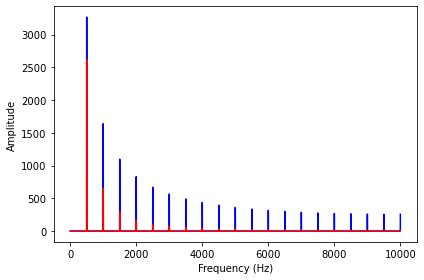

In [443]:
sawtooth_spectrum.plot(color='blue')
change_spectrum(sawtooth_spectrum)
sawtooth_spectrum.scale(400)
sawtooth_spectrum.plot(color='red')
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Получение аудио и `wave`


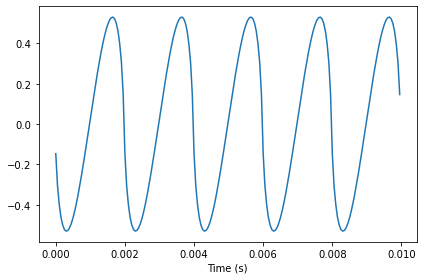

In [444]:
sawtooth_wave_new = sawtooth_spectrum.make_wave()
sawtooth_wave_new.segment(duration=0.01).plot()
decorate(xlabel='Time (s)')
sawtooth_wave_new.make_audio()
